In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Alphabets_data.csv')

In [3]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


### Data Exploration and Preprocessing

In [4]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [5]:
num_samples,num_features=df.shape
num_samples,num_features

(20000, 17)

In [6]:
df['letter'].value_counts()

letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64

In [7]:
features=df.drop('letter',axis=1)

In [8]:
target=df['letter']

In [9]:
label_encoder=LabelEncoder()

In [10]:
target_encoded=label_encoder.fit_transform(target)

In [11]:
target_onehot=to_categorical(target_encoded)

In [12]:
target_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [13]:
scaler=StandardScaler()

In [14]:
features_scaled=scaler.fit_transform(features)

### Model Implementation

In [15]:
x_train,x_test,y_train,y_test=train_test_split(features_scaled,target_onehot,train_size=0.8,random_state=42)

In [16]:
model=Sequential()
model.add(Dense(64,input_dim=x_train.shape[1],activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1],activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │           858 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,026 (15.73 KB)

 Trainable params: 4,026 (15.73 KB)

 Non-trainable params: 0 (0.00 B)

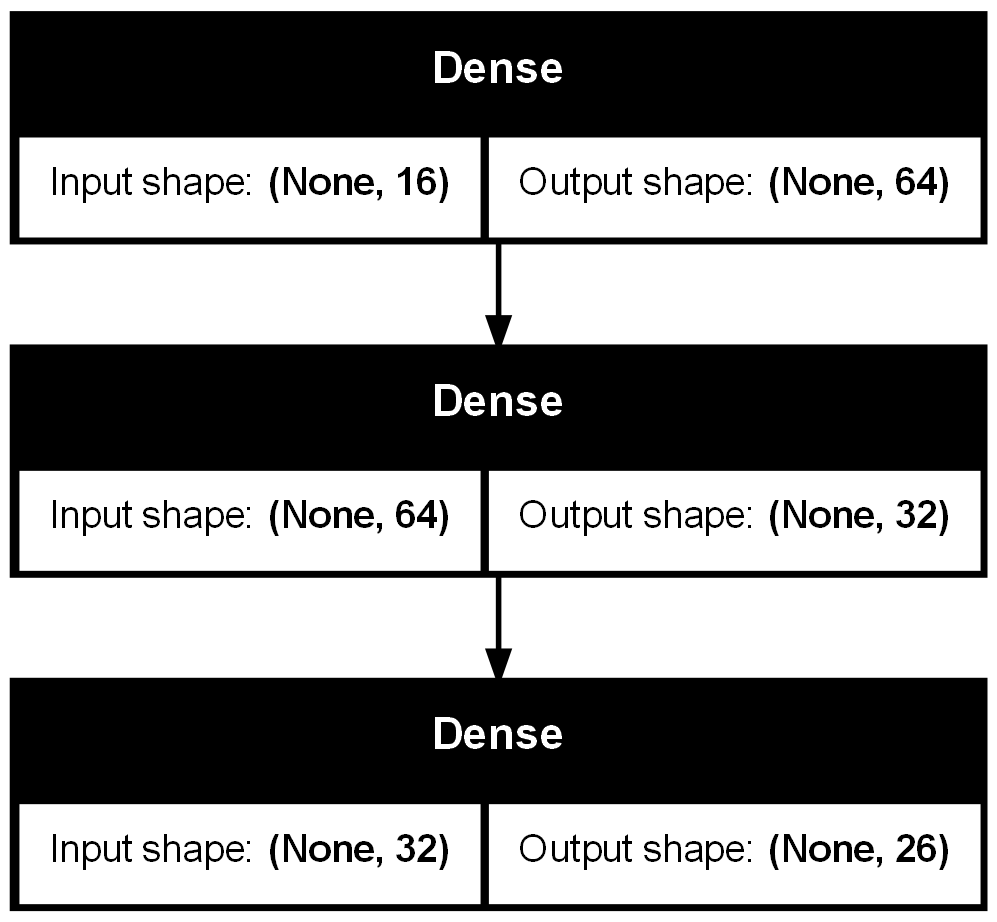

In [17]:
plot_model(model,show_shapes=True)

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3049 - loss: 2.5964 - val_accuracy: 0.6913 - val_loss: 1.1671
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7193 - loss: 1.0124 - val_accuracy: 0.7534 - val_loss: 0.8688
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7759 - loss: 0.7829 - val_accuracy: 0.7959 - val_loss: 0.7185
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8127 - loss: 0.6511 - val_accuracy: 0.8150 - val_loss: 0.6268
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8306 - loss: 0.5847 - val_accuracy: 0.8363 - val_loss: 0.5653
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8535 - loss: 0.5072 - val_accuracy: 0.8478 - val_loss: 0.5060
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8636 - loss: 0.4615 - val_accuracy: 0.8472 - val_loss: 0.4811
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8729 - loss: 0.4331 - val_accuracy: 0.

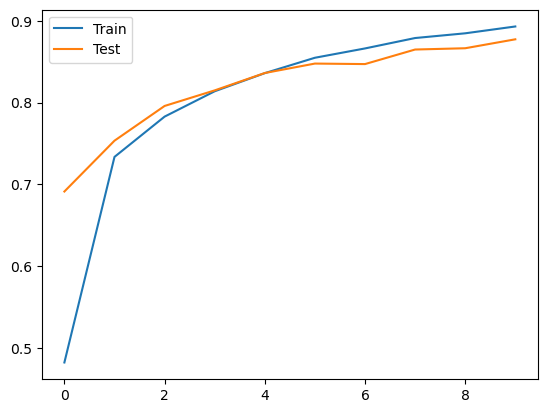

In [20]:
plt.plot(range(10),history.history['accuracy'],label='Train')
plt.plot(range(10),history.history['val_accuracy'],label='Test')
plt.legend(loc='best')

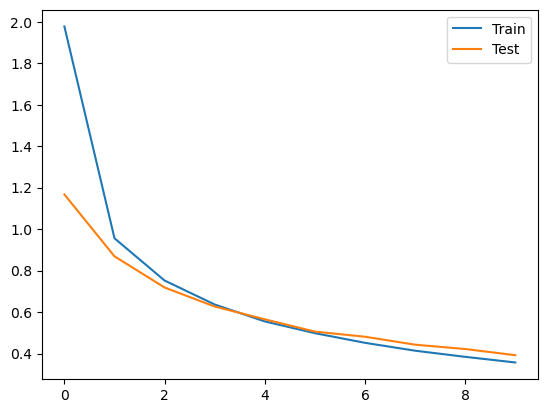

In [21]:
plt.plot(range(10),history.history['loss'],label='Train')
plt.plot(range(10),history.history['val_loss'],label='Test')
plt.legend(loc='best')

In [22]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8903 - loss: 0.3682
Test Accuracy: 89.25%


In [23]:
y_pred=model.predict(x_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [24]:
y_pred=np.argmax(model.predict(x_test),axis=1)
y_true=np.argmax(y_test,axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [25]:
accuracy=accuracy_score(y_true,y_pred)
print(f'Accuracy:{accuracy*100:.2f}%')

Accuracy:89.25%


In [26]:
print('Classification Report:')
print(classification_report(y_true,y_pred,target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

           A       0.93      0.95      0.94       149
           B       0.89      0.82      0.85       153
           C       0.89      0.86      0.87       137
           D       0.86      0.92      0.89       156
           E       0.87      0.89      0.88       141
           F       0.88      0.88      0.88       140
           G       0.90      0.77      0.83       160
           H       0.84      0.69      0.76       144
           I       0.96      0.88      0.92       146
           J       0.93      0.91      0.92       149
           K       0.72      0.89      0.80       130
           L       0.95      0.91      0.93       155
           M       0.95      0.92      0.93       168
           N       0.94      0.87      0.91       151
           O       0.88      0.87      0.87       145
           P       0.92      0.90      0.91       173
           Q       0.92      0.93      0.92       166
    

### Hyperparameter Tuning

#### Using manual grid search to find best params

In [27]:
from tensorflow.keras.optimizers import Adam,SGD

In [28]:
batch_sizes=[32,64,128]
epochs=[10,20]
optimizers=['adam','sgd']
learning_rates=[0.001,0.01,0.1]

In [29]:
best_accuracy=0
best_params={}

In [30]:
for batch_size in batch_sizes:
    for epoch in epochs:
        for optimizer_name in optimizers:
            for lr in learning_rates:
                # Creating a new instance of the model for each iteration
                model=Sequential()
                model.add(Dense(64,input_dim=x_train.shape[1],activation='relu'))
                model.add(Dense(32,activation='relu'))
                model.add(Dense(y_train.shape[1],activation='softmax'))
                
                # Configuring the optimizer with the current learning rate
                if optimizer_name=='adam':
                    optimizer=Adam(learning_rate=lr)
                elif optimizer_name=='sgd':
                    optimizer=SGD(learning_rate=lr)
                
                # Compiling the model
                model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
                
                # Training the model
                history=model.fit(x_train,y_train,epochs=epoch,batch_size=batch_size,validation_data=(x_test,y_test),verbose=0)
                
                # Evaluating the model on the validation set
                val_accuracy=history.history['val_accuracy'][-1]
                
                # Tracking the best model and hyperparameters
                if val_accuracy>best_accuracy:
                    best_accuracy=val_accuracy
                    best_params={'batch_size':batch_size,'epochs':epoch,'optimizer':optimizer_name,'learning_rate':lr}

                print(f"Trained with batch_size={batch_size}, epochs={epoch}, optimizer={optimizer_name}, learning_rate={lr}, val_accuracy={val_accuracy:.4f}")


Trained with batch_size=32, epochs=10, optimizer=adam, learning_rate=0.001, val_accuracy=0.9060
Trained with batch_size=32, epochs=10, optimizer=adam, learning_rate=0.01, val_accuracy=0.9040
Trained with batch_size=32, epochs=10, optimizer=adam, learning_rate=0.1, val_accuracy=0.1670
Trained with batch_size=32, epochs=10, optimizer=sgd, learning_rate=0.001, val_accuracy=0.2735
Trained with batch_size=32, epochs=10, optimizer=sgd, learning_rate=0.01, val_accuracy=0.7805
Trained with batch_size=32, epochs=10, optimizer=sgd, learning_rate=0.1, val_accuracy=0.9075
Trained with batch_size=32, epochs=20, optimizer=adam, learning_rate=0.001, val_accuracy=0.9277
Trained with batch_size=32, epochs=20, optimizer=adam, learning_rate=0.01, val_accuracy=0.9220
Trained with batch_size=32, epochs=20, optimizer=adam, learning_rate=0.1, val_accuracy=0.0365
Trained with batch_size=32, epochs=20, optimizer=sgd, learning_rate=0.001, val_accuracy=0.4793
Trained with batch_size=32, epochs=20, optimizer=sgd,

### Evaluation

In [31]:
print(f"Best validation accuracy: {best_accuracy:.4f}")

Best validation accuracy: 0.9320


In [32]:
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'batch_size': 128, 'epochs': 10, 'optimizer': 'adam', 'learning_rate': 0.01}


##### The performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning.

Default Model Performance:

Default Hyperparameters: Usually, with default hyperparameters, I have used an optimizer is Adam, a fixed batch size of 32, and a default number of hidden layers and neurons.

Training Results: While the default model can perform reasonably well, it's often not optimized for the specific dataset or problem.

Common Outcomes:

Accuracy: The default model has achieved a decent accuracy but not generalized well to new, unseen data.

Tuned Model Performance:

Learning Rate: A slower learning rate with different hypermeters.

Optimizer: Tuned with both Adam and SGD for better performance.

Batch Size: Used three batch sizes to see what works best for model and hardware.

Improvement from Hyperparameter Tuning:

Accuracy: Tuned model achieved higher validation accuracy since the model is better able to capture the underlying patterns in the data.

Generalization: A properly tuned model will generalize better to unseen data (test set), meaning it performs well on both the training and validation sets.

Convergence Speed: Tuning the learning rate, optimizer, and batch size often results in faster convergence. The model will reach a higher accuracy in fewer epochs.

Balanced Performance: By fine-tuning batch size and learning rate, achieved a better balance between bias and variance.